In [262]:
# libraries and utiliies
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from imblearn.over_sampling import SMOTE
import imblearn 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import statistics

from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix

In [203]:
"""
# importing file
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
"""

"\n# importing file\nfrom google.colab import drive\ndrive.mount('/gdrive')\n%cd /gdrive\n"

In [204]:
copied_path = "/content/drive/MyDrive/Projects/Project_1/data/raw/BankChurners.csv"
df = pd.read_csv(copied_path)

In [205]:
df.head(3)

CLIENTNUM  ... Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0  768805383  ...                                            0.99991                                                                                
1  818770008  ...                                            0.99994                                                                                
2  713982108  ...                                            0.99998                                                                                

[3 rows x 23 columns]

In [206]:
df.shape

(10127, 23)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

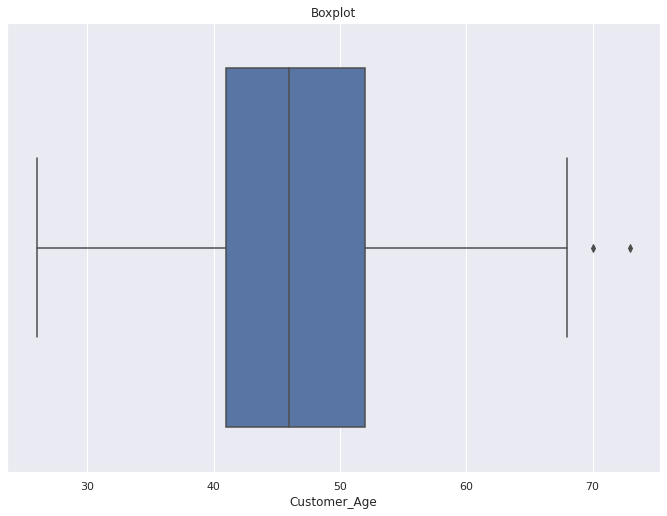

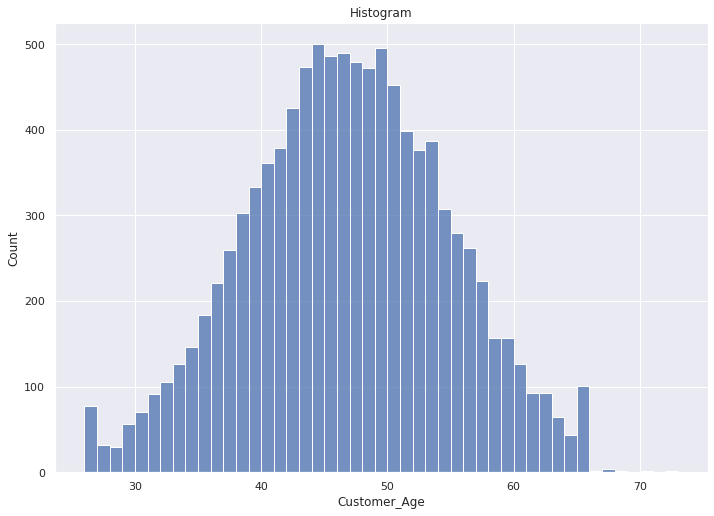

In [208]:
# Graphing the destribution of the age
def boxPol_histPlot(data_list, box_plot=True, hist_plot=True):
  for i in data_list:
    if box_plot:
      _ = sns.boxplot(x=df[i]).set_title("Boxplot")
      plt.show()
    if hist_plot:
      _ = sns.histplot(data=df, x=i).set_title("Histogram")
      plt.show()

boxPol_histPlot(['Customer_Age'])

In [209]:
# destribution of gender and different card statuses
df["Card_Category"].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [210]:
df["Gender"].unique()

array(['M', 'F'], dtype=object)

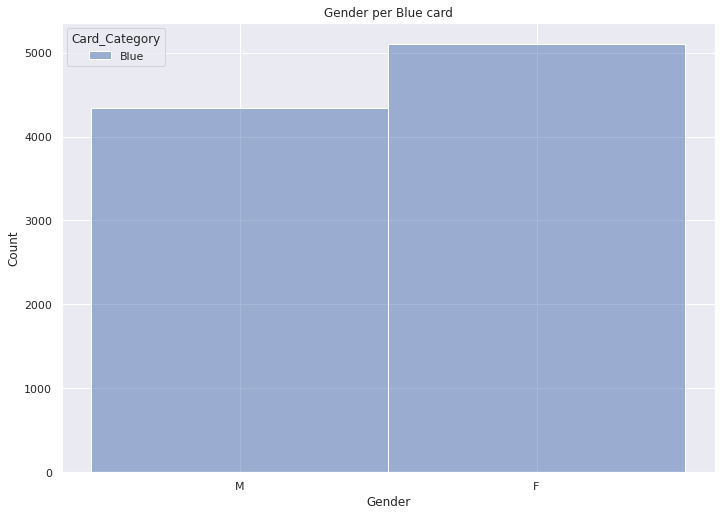

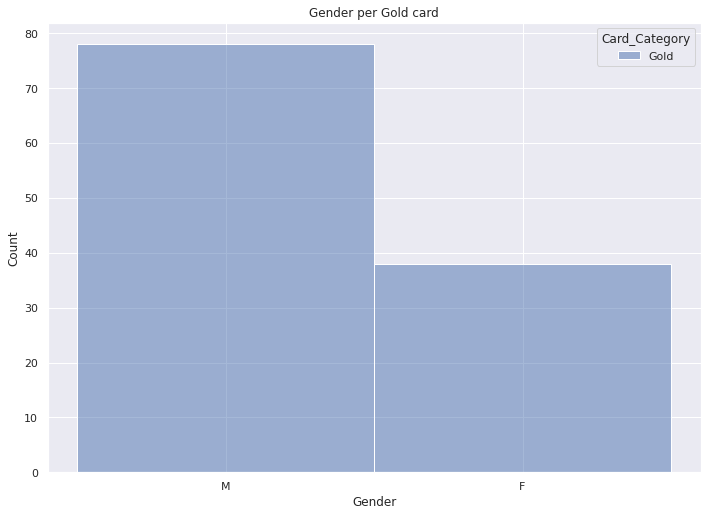

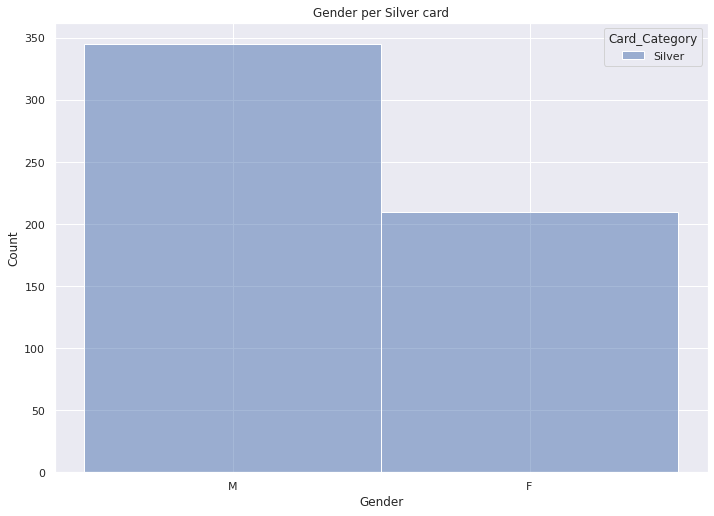

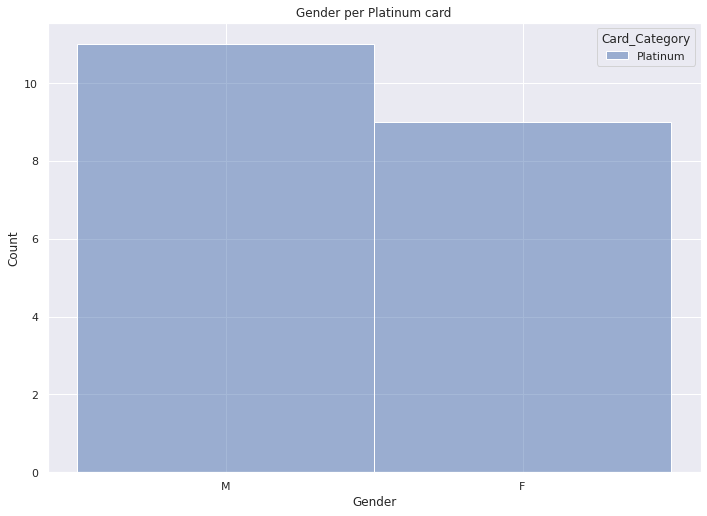

In [211]:
# destribution
def show_gender_by_card_destribution():
  list_of_card = df["Card_Category"].unique()
  for card_type in list_of_card:
    _ = sns.histplot(data=df[df['Card_Category'] == card_type], x='Gender',
                    hue="Card_Category").set_title(f'Gender per {card_type} card')
    plt.show()

show_gender_by_card_destribution()

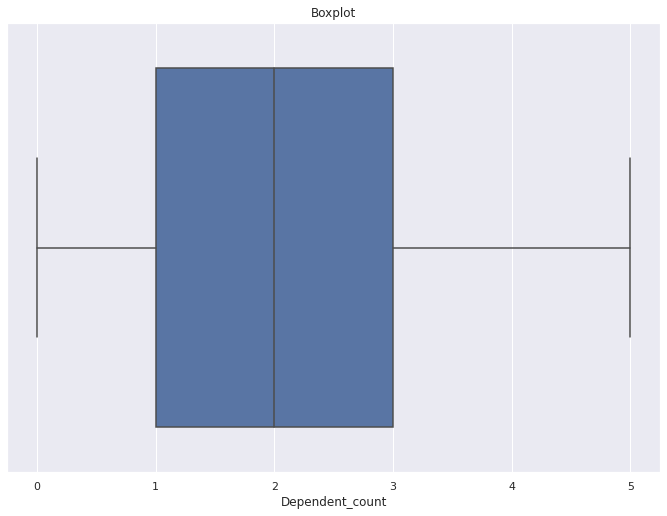

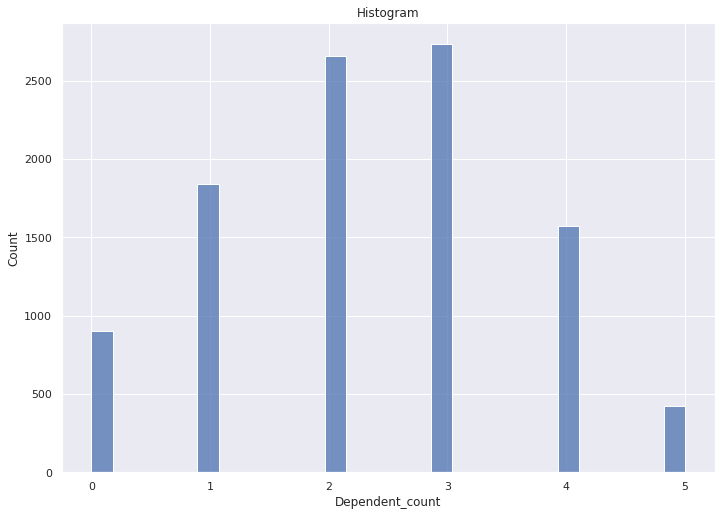

In [212]:
# destribution of Dependent_count column
boxPol_histPlot(['Dependent_count'])

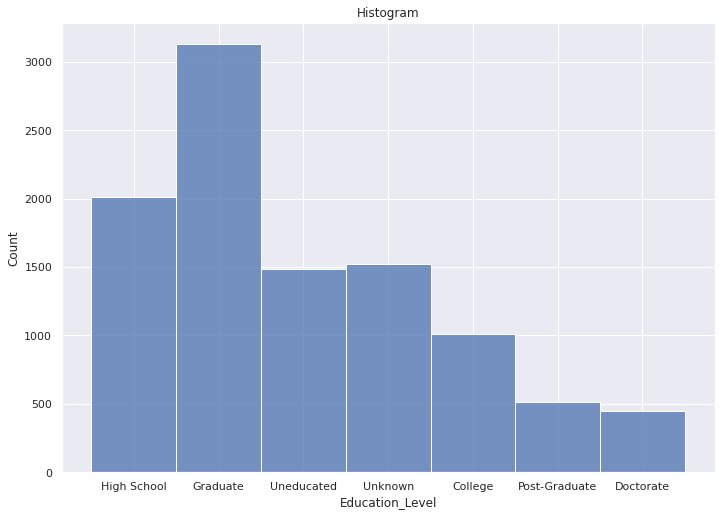

In [213]:
# proportion of education
boxPol_histPlot(['Education_Level'], box_plot=False)

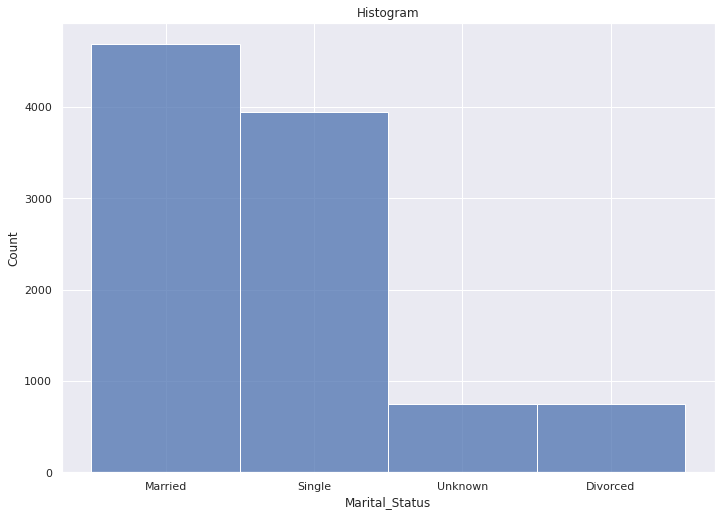

In [214]:
# checking marriae status
boxPol_histPlot(['Marital_Status'], box_plot=False)

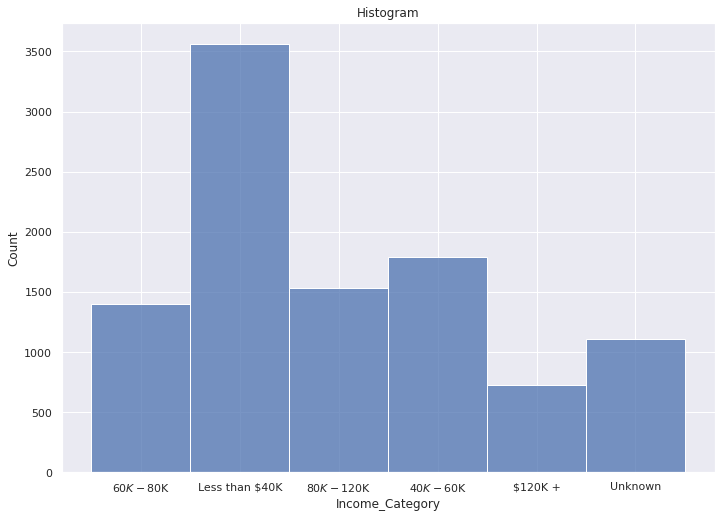

In [215]:
# proportion of diffeent income levels
boxPol_histPlot(['Income_Category'], box_plot=False)

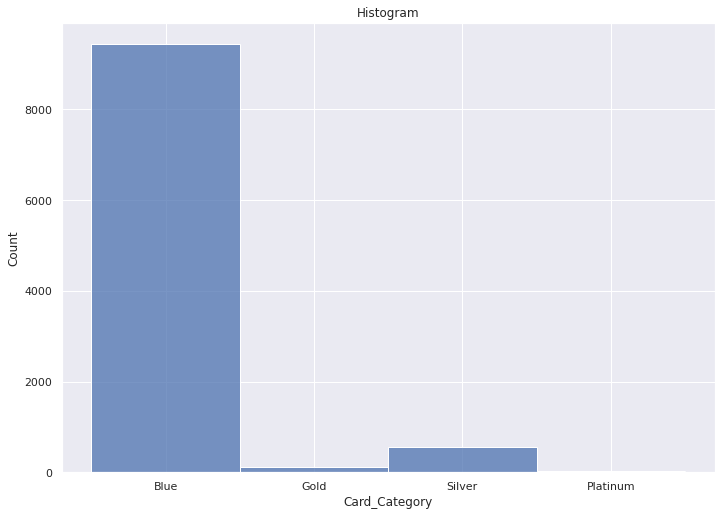

In [216]:
# proportion of defferent card categories
boxPol_histPlot(['Card_Category'], box_plot=False)

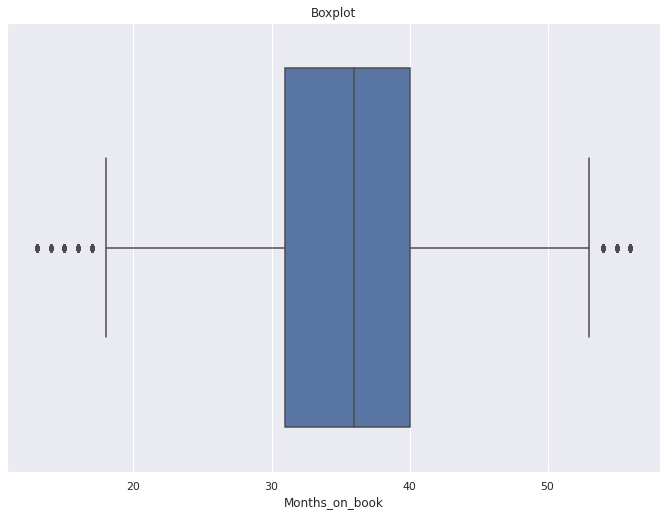

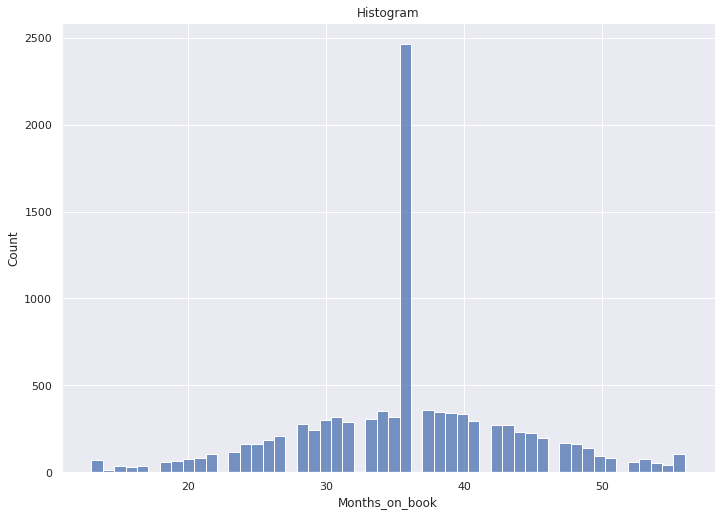

In [217]:
# distribution of mnoths the customer is part of the bank
boxPol_histPlot(['Months_on_book'])

In [218]:
# checking the "kurtosis" of this column
print(f"Kurtosis for 'Months_on_book': \
 {round(df['Months_on_book'].kurt(), 2)}. In other words, data is not normally\
 distributed.")

Kurtosis for 'Months_on_book':  0.4. In other words, data is not normally distributed.


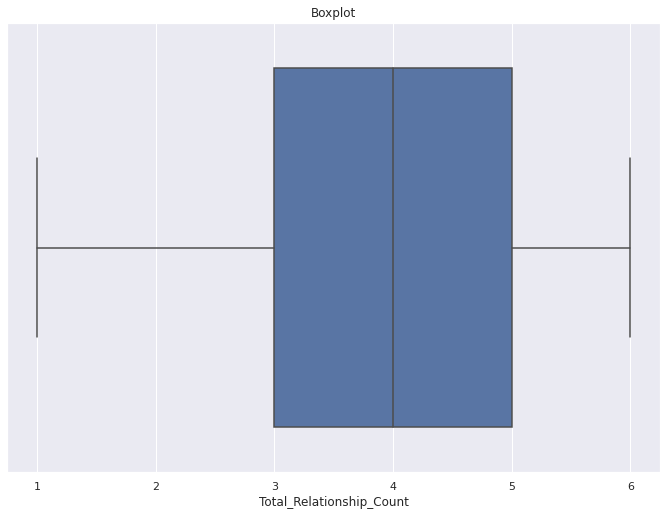

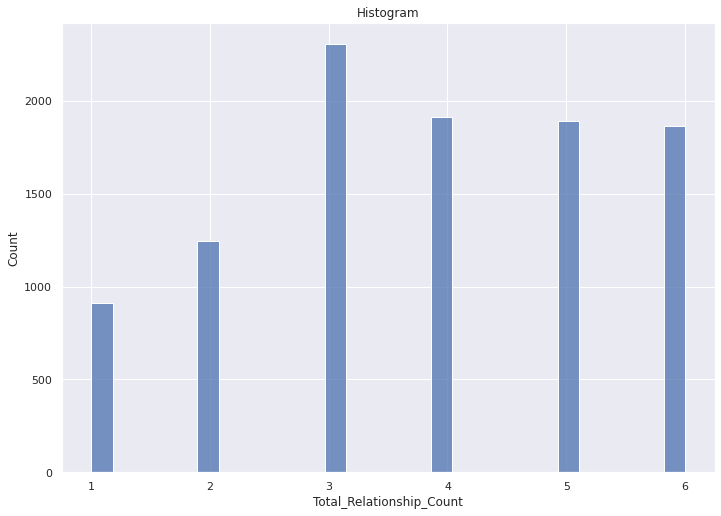

In [219]:
# distribution of total number of products held by the customer
boxPol_histPlot(['Total_Relationship_Count'])

<h3>Note: this column has uniform very close uniform destribution that could 
be useles for us for developing predictive model.</h3>

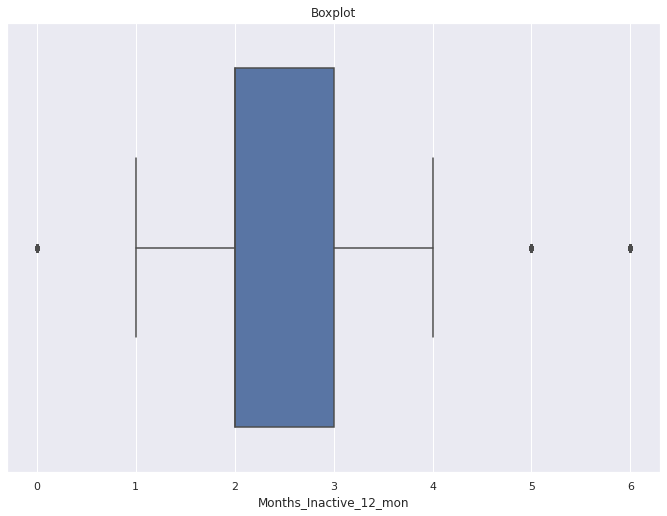

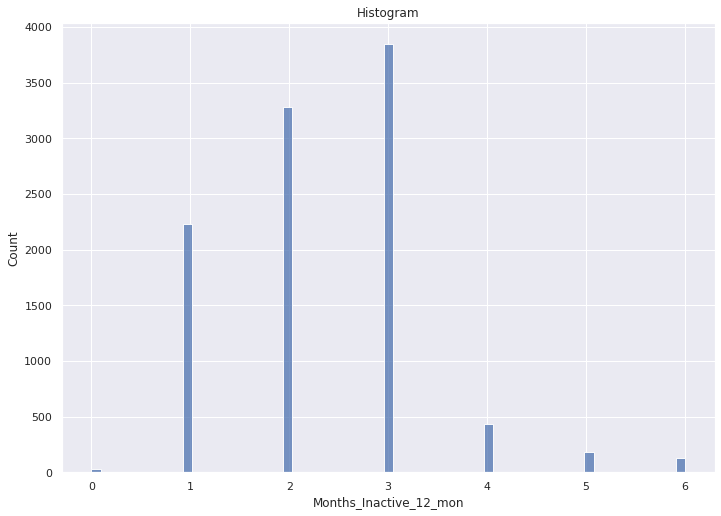

In [220]:
# distribution of number of months inactive in the last 12 months
boxPol_histPlot(['Months_Inactive_12_mon'])

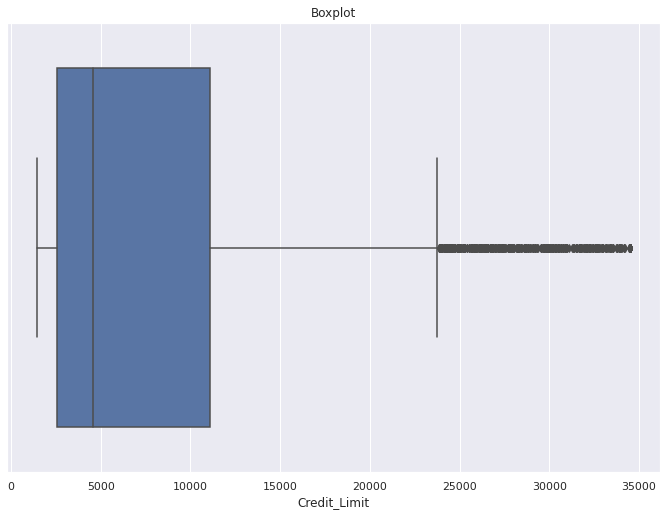

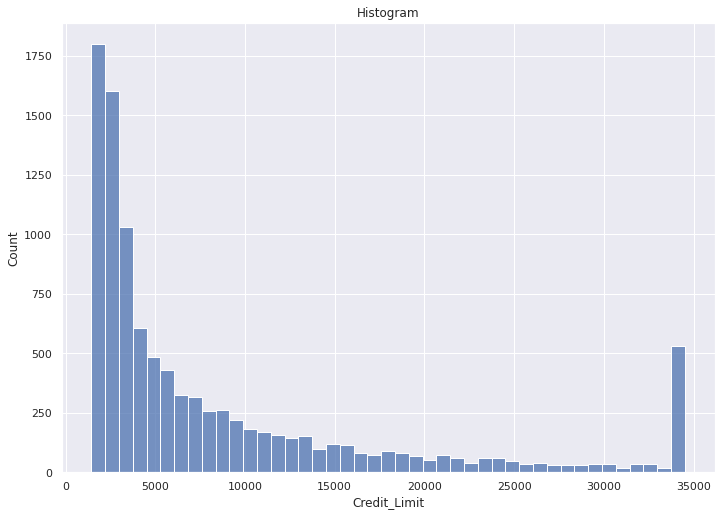

In [221]:
# distribution of the Credit limit
boxPol_histPlot(['Credit_Limit'])

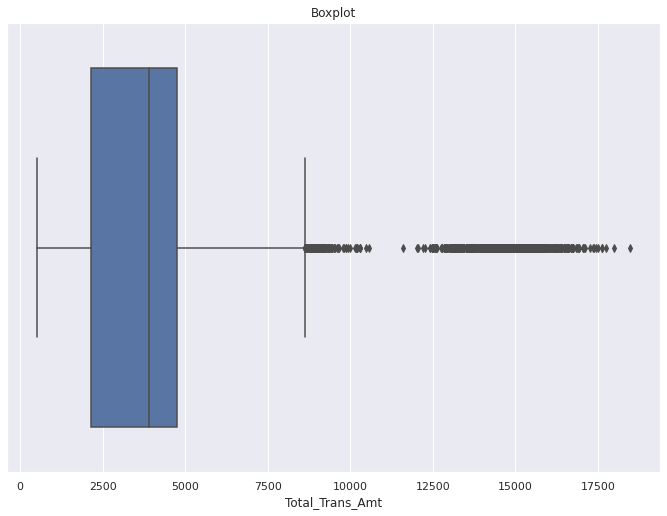

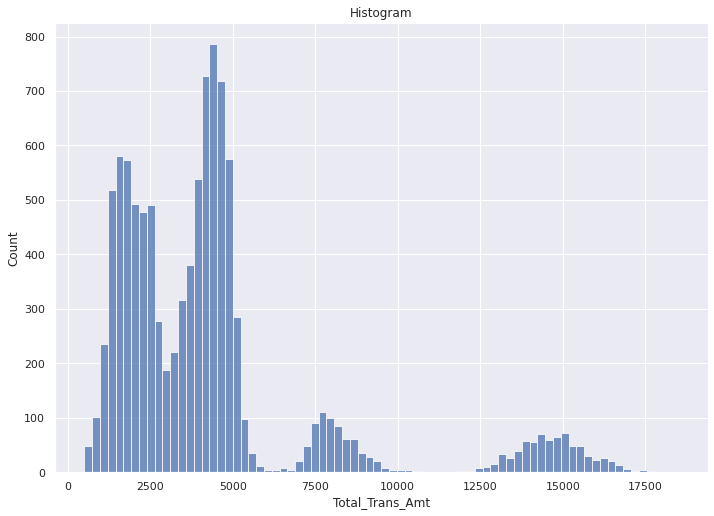

In [222]:
# distribution of the total transaction amount (last 12 months)
boxPol_histPlot(['Total_Trans_Amt'])

<h1>NOTE: we can see the distribution of this column is multimodal. So, we can
apply PCA to find the different groups of this data.</h1>

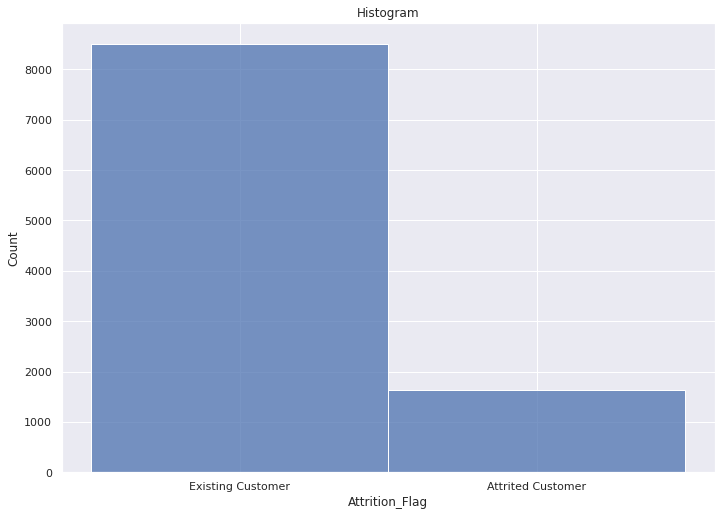

In [223]:
# Proportion of churn vs not churn customers
df['Attrition_Flag'].unique()
boxPol_histPlot(['Attrition_Flag'], box_plot=False)

<h1>NOTE: as we can see one class is underrepresented over another one. So, we
need to use SMOTE teqnique to balance out these two classes. so our model is 
able to catch mode information about underrepresented class.</h1>

<h1>DATA PREPROCESSING</h1>

In [224]:
df['Attrition_Flag'] = df['Attrition_Flag'].map(lambda x: 1 if x == "Attrited Customer" else 0)
df['Attrition_Flag'].unique(), df['Attrition_Flag'].dtype

(array([0, 1]), dtype('int64'))

In [225]:
df['Gender'] = df['Gender'].map(lambda x: 1 if x == "F" else 0)
df['Gender'].unique(), df['Gender'].dtype

(array([0, 1]), dtype('int64'))

In [226]:
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [227]:
# creating dummies for Education level column
df = pd.concat([df, pd.get_dummies(
    df['Education_Level']).drop(['Unknown'], axis=1)], axis=1)
df.head(2)

CLIENTNUM  Attrition_Flag  ...  Post-Graduate  Uneducated
0  768805383               0  ...              0           0
1  818770008               0  ...              0           0

[2 rows x 29 columns]

In [228]:
# creating dummies for Encome Category
df = pd.concat([df, pd.get_dummies(
    df['Income_Category']).drop(['Unknown'], axis=1)], axis=1)
df.head(3)

CLIENTNUM  Attrition_Flag  ...  $80K - $120K  Less than $40K
0  768805383               0  ...             0               0
1  818770008               0  ...             0               1
2  713982108               0  ...             1               0

[3 rows x 34 columns]

In [229]:
df = pd.concat(
    [df, pd.get_dummies(df['Marital_Status']).drop(['Unknown'], axis=1)],
    axis=1)
df.head(3)

CLIENTNUM  Attrition_Flag  Customer_Age  ...  Divorced  Married Single
0  768805383               0            45  ...         0        1      0
1  818770008               0            49  ...         0        0      1
2  713982108               0            51  ...         0        1      0

[3 rows x 37 columns]

In [230]:
# creating dummies or Card Category
df = pd.concat(
    [df, pd.get_dummies(df['Card_Category']).drop(['Platinum'], axis=1)],
    axis=1)
df.head(2)

CLIENTNUM  Attrition_Flag  Customer_Age  Gender  ...  Single Blue Gold Silver
0  768805383               0            45       0  ...       0    1    0      0
1  818770008               0            49       1  ...       1    1    0      0

[2 rows x 40 columns]

In [231]:
# dopping catgorical columns
df = df.drop(['Education_Level', 'Income_Category', 'Marital_Status',
              'Card_Category', 'CLIENTNUM', "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
              "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], axis=1)
df.head(2)

Attrition_Flag  Customer_Age  Gender  ...  Blue  Gold  Silver
0               0            45       0  ...     1     0       0
1               0            49       1  ...     1     0       0

[2 rows x 33 columns]

In [232]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
       'Uneducated', '$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       'Less than $40K', 'Divorced', 'Married', 'Single', 'Blue', 'Gold',
       'Silver'],
      dtype='object')

In [233]:
# normolizing data
def normolizing_data(data):
  x = data.values
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x)
  df_normolized = pd.DataFrame(x_scaled, columns=data.columns)
  print(df_normolized.head(3))
  return df_normolized

df_normolized = normolizing_data(df)

   Attrition_Flag  Customer_Age  Gender  ...  Blue  Gold  Silver
0             0.0      0.404255     0.0  ...   1.0   0.0     0.0
1             0.0      0.489362     1.0  ...   1.0   0.0     0.0
2             0.0      0.531915     0.0  ...   1.0   0.0     0.0

[3 rows x 33 columns]


In [234]:
# function to see correleation
def data_correlation(data):
  sns.set(rc={'figure.figsize':(33.7,10.27)})
  _ = sns.heatmap(data.corr('pearson'), annot=True).set_title('Pearon correlation')
  plt.show()
  _ = sns.heatmap(data.corr('spearman'), annot=True).set_title('Spearman correlation')
  plt.show()  

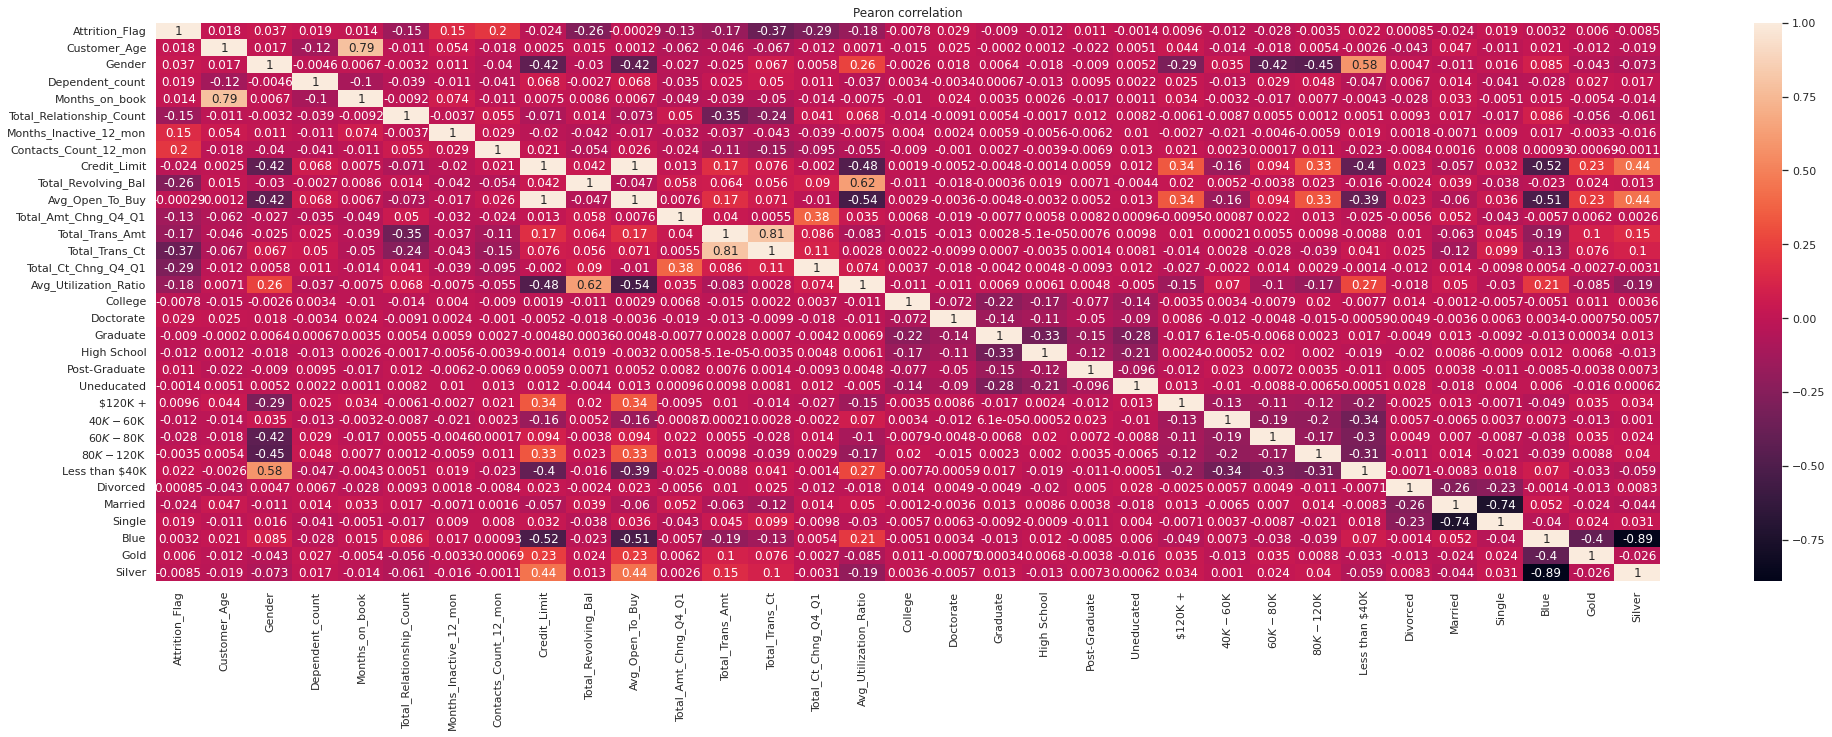

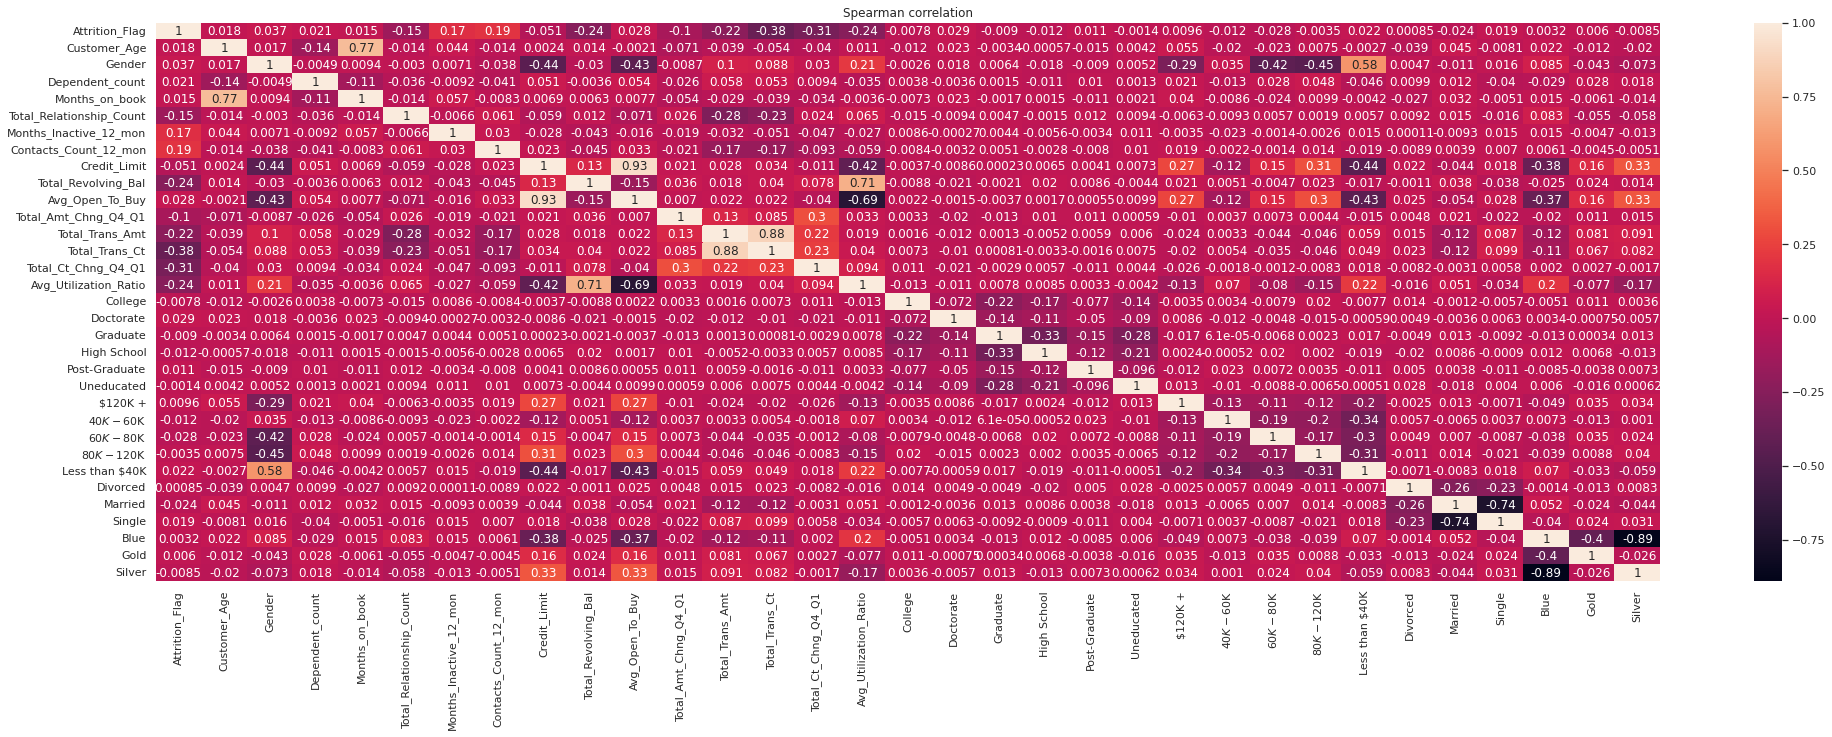

In [235]:
data_correlation(df_normolized)

In [236]:
# reset index
def df_reset_index(data):
  return data.reset_index(drop=True)

In [237]:
# splitting data
X_train, X_test = train_test_split(df, test_size=0.3, random_state=42)
X_train = df_reset_index(X_train)
X_test = df_reset_index(X_test)
X_train.shape, X_test.shape

((7088, 33), (3039, 33))

In [238]:
X_train[X_train['Attrition_Flag'] == 0].shape, X_train[X_train['Attrition_Flag'] == 1].shape

((5957, 33), (1131, 33))

In [239]:
X_test[X_test['Attrition_Flag'] == 0].shape, X_test[X_test['Attrition_Flag'] == 1].shape

((2543, 33), (496, 33))

In [240]:
# data upsampling using SMOTE
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
def oversampling_data(data):
  oversample = SMOTE()
  X, y = oversample.fit_resample(
      X_train[X_train.columns[1:]], X_train[X_train.columns[0]])
  print(f"Independent feature(s): {X.shape}\n Dependent feature: {y.shape}")
  return X, y

X, y = oversampling_data(X_train)

Independent feature(s): (11914, 32)
 Dependent feature: (11914,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


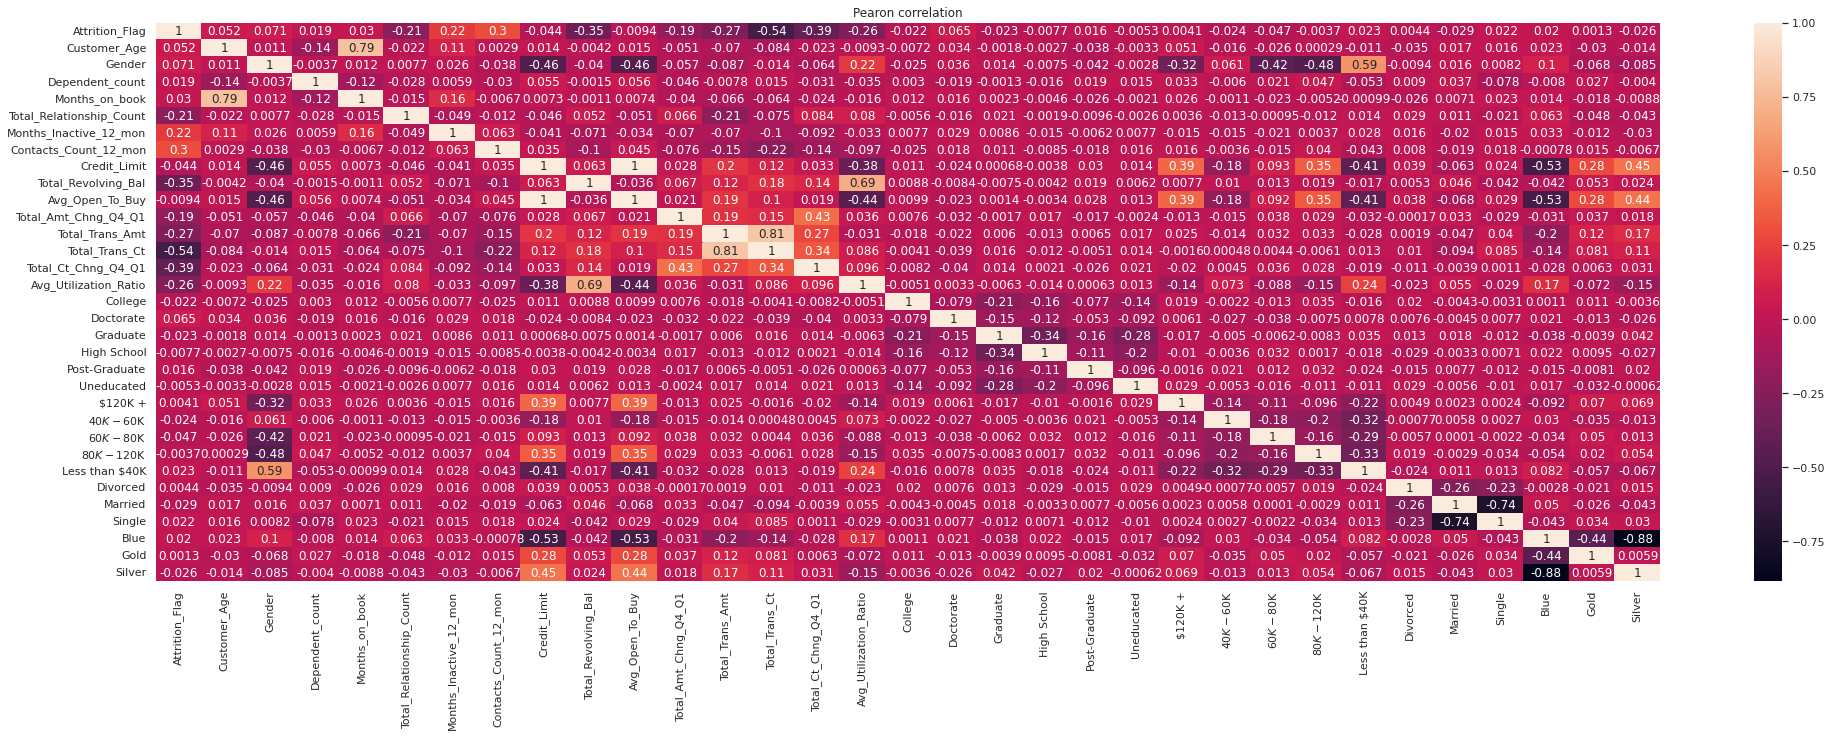

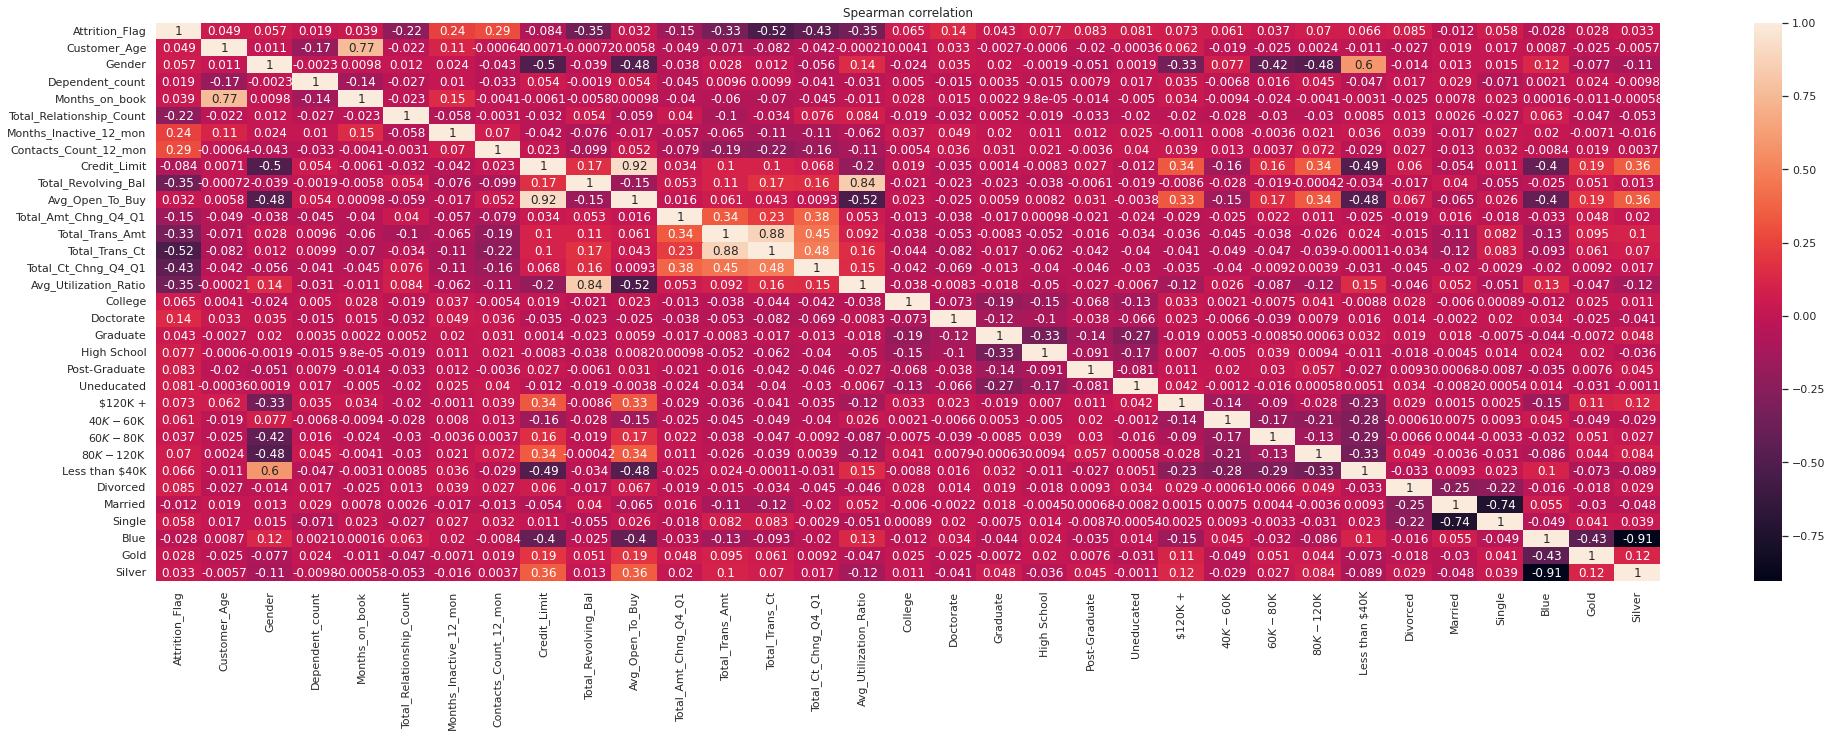

In [241]:
# taking closer look at balanced data
part_1 = pd.DataFrame(data=y).rename(columns={0: "Attrition_Flag"})
part_2 = pd.DataFrame(data=X, columns=df.columns[1:])
part_3 = pd.concat([part_1, part_2], axis=1)

# looking at correlation of balanced data
data_correlation(part_3)

In [242]:
ohe_data = part_3[part_3.columns[16:]]
ohe_data.columns

Index(['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
       'Uneducated', '$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       'Less than $40K', 'Divorced', 'Married', 'Single', 'Blue', 'Gold',
       'Silver'],
      dtype='object')

In [243]:
unsampled_df = part_3.drop(columns=part_3.columns[16:])
unsampled_df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<h3><b>PCA of One Hot Encoded Data</b></h3>

In [244]:
# we will use principal component analysis toreduce the dimensionality of the
# one hot encoded categorical variable, losing some of the variances.
def pca_to_data(data, n_components=4, pre_trained_model=None):
  if pre_trained_model:
    pca_model = pre_trained_model
    pc_matrix = pca_model.transform(data)
  else:
    N_COMPONENTS = n_components

    pca_model = PCA(n_components=N_COMPONENTS)
    pc_matrix = pca_model.fit_transform(data)

  print(f"Original data shape: {data.shape}\n"
  f"PCA data shape:{pc_matrix.shape}")

  evr = pca_model.explained_variance_ratio_
  print(f"Explained variance ration: {evr}")

  total_var = evr.sum() * 100
  print(f"Total explained variance ration: {total_var}")

  test = pd.DataFrame(pca_model.components_, columns=data.columns,
                      index=['PC-1', 'PC-2', 'PC-3', 'PC-4'])
  pca_feature_names = []
  for i in range(len(test)):
    value_1 = abs(test.iloc[i, :].min())
    value_2 = abs(test.iloc[i, :].max())
    if value_1 > value_2:
      pca_feature_names.append(
          test.iloc[i, :][test.iloc[i, :] == test.iloc[i, :].min()].index[0])
    else:
      pca_feature_names.append(
          test.iloc[i, :][test.iloc[i, :] == test.iloc[i, :].max()].index[0]) 

  pc_matrix_outcome = pd.DataFrame(pc_matrix, columns=pca_feature_names)

  return pca_model, pc_matrix_outcome

In [245]:
# appling the prencipal component on our dummy features
pca_model_1, pca_matrix_1 = pca_to_data(data=ohe_data, n_components=4)

Original data shape: (11914, 17)
PCA data shape:(11914, 4)
Explained variance ration: [0.20720895 0.13980114 0.1245578  0.08249637]
Total explained variance ration: 55.4064258854014


In [246]:
# function to concatanete two dataframes
def concat_dataframes(data_1, data_2):
  result = pd.concat([data_1, data_2], axis=1)
  print(result.head(2))
  return result

In [247]:
# applying concatanation
unsampled_df_with_pcs = concat_dataframes(unsampled_df, pca_matrix_1)

   Attrition_Flag  Customer_Age  Gender  ...  Less than $40K  Graduate  $40K - $60K
0               0          49.0     0.0  ...       -0.418979 -0.087000    -0.100773
1               0          61.0     1.0  ...       -0.344511 -0.515376    -0.387632

[2 rows x 20 columns]


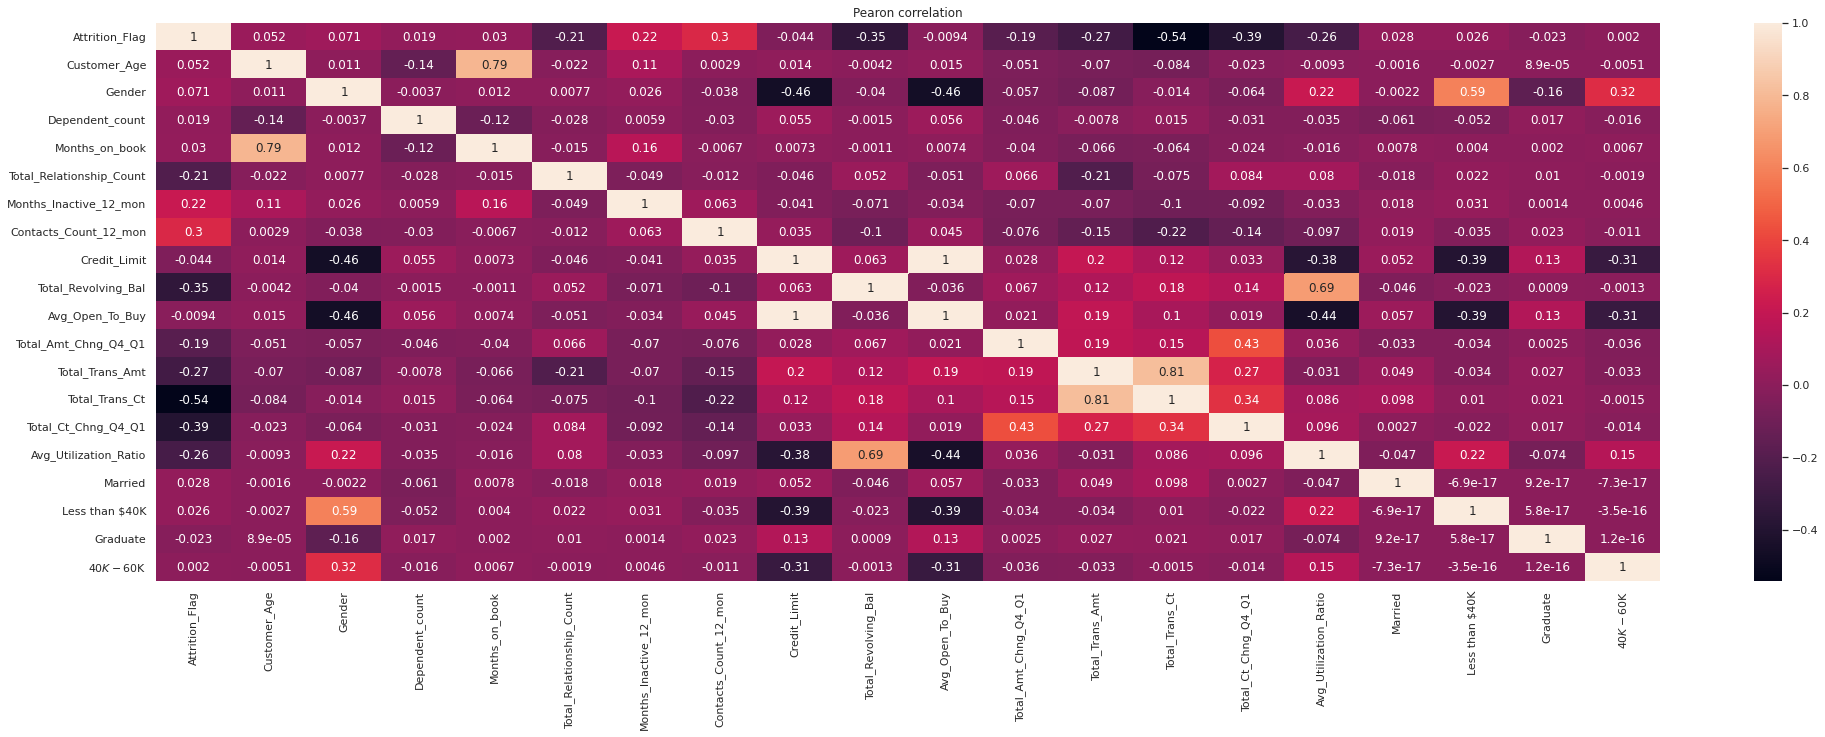

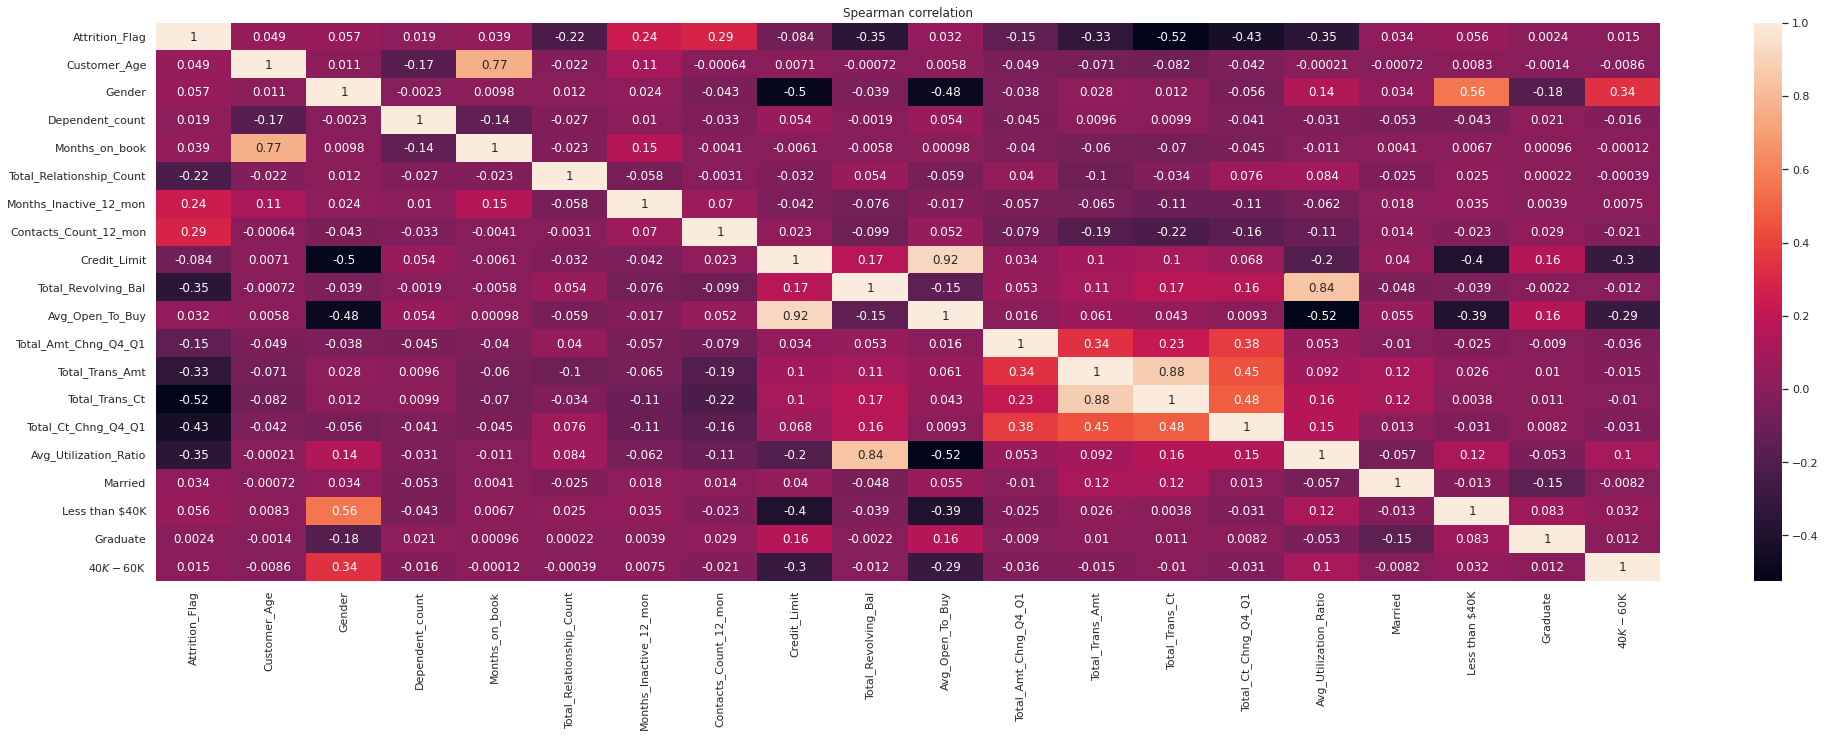

In [248]:
# looking at correlation
data_correlation(unsampled_df_with_pcs)

<h1>Model Selection and Evaluation</h1>

In [249]:
# preparing the testing part
def preparing_testing_data_part(X_test, pca_model_1=None):
  first_part = X_test[X_test.columns[:16]]
  second_part = X_test[X_test.columns[16:]]

  pca_model_2, pca_matrix_2 = pca_to_data(data=second_part,
                                          pre_trained_model=pca_model_1)
  X_test_pca = concat_dataframes(first_part, pca_matrix_2)

  X_test = X_test_pca[X_test_pca.columns[1:]]
  y_test = X_test_pca[X_test_pca.columns[0]]

  return X_test, y_test

In [250]:
# splitting data before fitting
X_train = unsampled_df_with_pcs[unsampled_df_with_pcs.columns[1:]]
y_train = unsampled_df_with_pcs['Attrition_Flag']
X_test, y_test = preparing_testing_data_part(X_test, pca_model_1=pca_model_1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

Original data shape: (3039, 17)
PCA data shape:(3039, 4)
Explained variance ration: [0.20720895 0.13980114 0.1245578  0.08249637]
Total explained variance ration: 55.4064258854014
   Attrition_Flag  Customer_Age  Gender  ...  Less than $40K  Graduate  $40K - $60K
0               0            48       1  ...        0.596962 -0.478776     0.474577
1               0            59       0  ...        0.596962 -0.478776     0.474577

[2 rows x 20 columns]


((11914, 19), (11914,), (3039, 19), (3039,))

<h1>CROSS VALIDATION</h1>

In [251]:
# base line
pipe_model_RandomForest_scaled = Pipeline( verbose=True, steps=[
    ('scaler', StandardScaler()),
    ("rf", RandomForestClassifier(random_state=42)) ])
pipe_model_RandomForest = Pipeline( verbose=True, steps=[
    ("rf", RandomForestClassifier(random_state=42)) ])

pip_model_AdaBoost_scaled = Pipeline( verbose=True, steps=[
    ('scaler', StandardScaler()),
    ("ab", AdaBoostClassifier(random_state=42)) ])
pip_model_AdaBoost = Pipeline( verbose=True, steps=[
    ("ab", AdaBoostClassifier(random_state=42)) ])

pip_model_SVC_scaled = Pipeline( verbose=True, steps=[
    ('scaler', StandardScaler()),
    ("ab", SVC(random_state=42)) ])

In [265]:
def find_f1_score(pipeline_list):
  CV = 7
  f1_result = []
  for i in pipeline_list:
    temp = cross_val_score(i[1], X_train, y_train, cv=CV, scoring='f1')
    print(f"F1 for {i[0]}: {temp}")
    print(f"F1 avr: {statistics.mean(temp)}")
    f1_result.append((i[0], temp))
    ax = plt.plot(list(range(1, CV+1)), temp)
    plt.title(i[0])
    plt.show()

  return f1_result

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing rf, total=   2.6s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing rf, total=   2.6s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing rf, total=   2.5s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing rf, total=   2.5s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing rf, total=   2.5s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing rf, total=   2.5s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing rf, total=   2.5s
F1 for

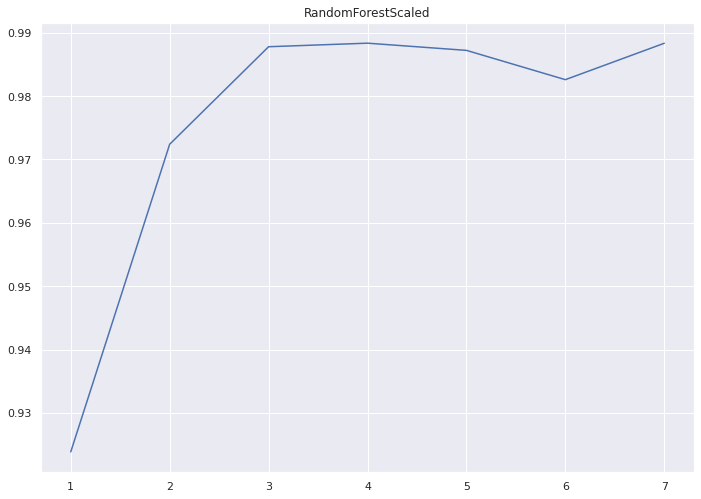

[Pipeline] ................ (step 1 of 1) Processing rf, total=   2.6s
[Pipeline] ................ (step 1 of 1) Processing rf, total=   2.5s
[Pipeline] ................ (step 1 of 1) Processing rf, total=   2.5s
[Pipeline] ................ (step 1 of 1) Processing rf, total=   2.5s
[Pipeline] ................ (step 1 of 1) Processing rf, total=   2.5s
[Pipeline] ................ (step 1 of 1) Processing rf, total=   2.5s
[Pipeline] ................ (step 1 of 1) Processing rf, total=   2.5s
F1 for RandomForest: [0.92451653 0.97240164 0.98779779 0.98835856 0.98722416 0.98259861
 0.98834499]
F1 avr: 0.9758917540418133


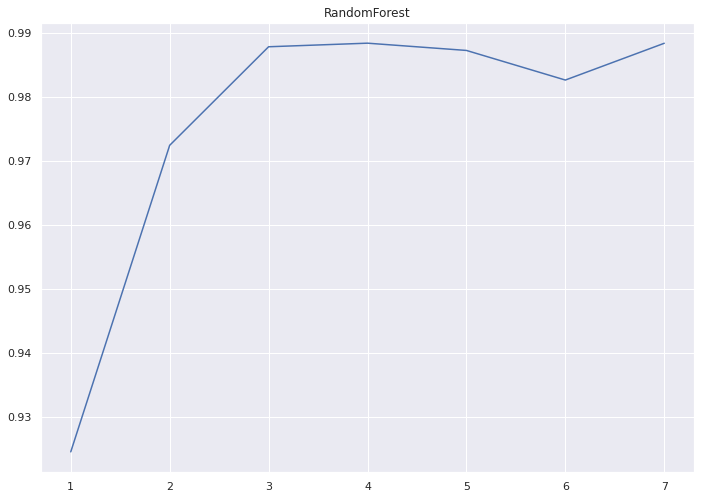

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   1.1s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   1.1s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   1.1s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   1.1s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   1.1s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   1.1s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   1.1s
F1 for

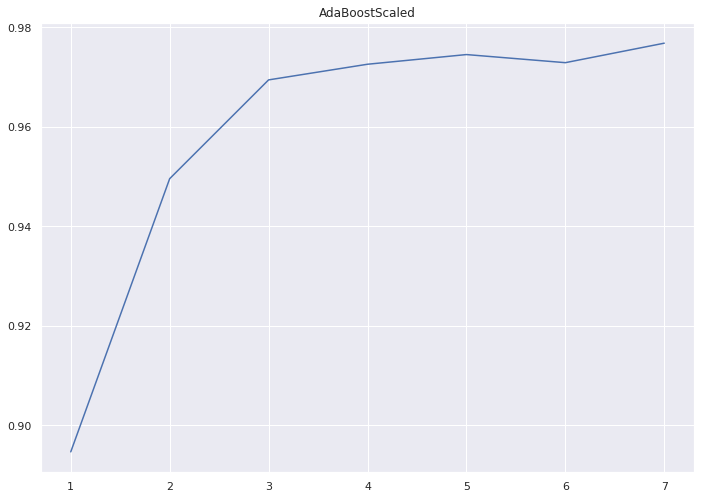

[Pipeline] ................ (step 1 of 1) Processing ab, total=   1.2s
[Pipeline] ................ (step 1 of 1) Processing ab, total=   1.1s
[Pipeline] ................ (step 1 of 1) Processing ab, total=   1.1s
[Pipeline] ................ (step 1 of 1) Processing ab, total=   1.1s
[Pipeline] ................ (step 1 of 1) Processing ab, total=   1.1s
[Pipeline] ................ (step 1 of 1) Processing ab, total=   1.1s
[Pipeline] ................ (step 1 of 1) Processing ab, total=   1.1s
F1 for AdaBoost: [0.89463722 0.9495549  0.9694172  0.97256276 0.97450753 0.9728794
 0.97679814]
F1 avr: 0.9586224495333296


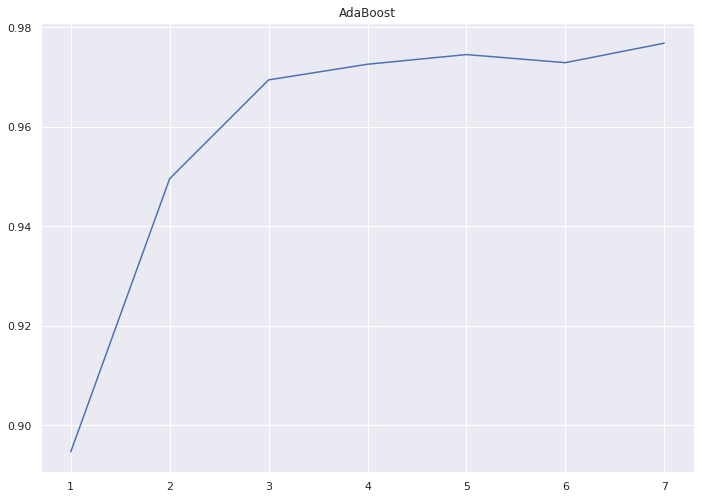

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   1.9s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   2.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   2.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   2.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   2.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   1.9s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   2.0s
F1 for

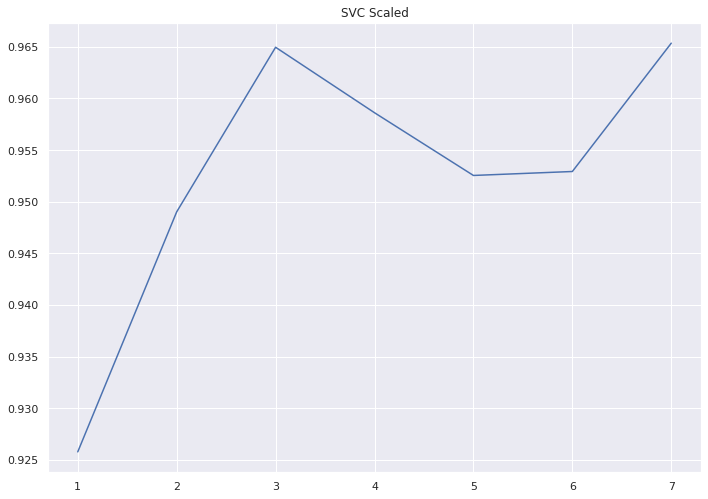

In [266]:
pipeline_list = [("RandomForestScaled" ,pipe_model_RandomForest_scaled), 
                 ("RandomForest", pipe_model_RandomForest), 
                 ("AdaBoostScaled", pip_model_AdaBoost_scaled),
                 ("AdaBoost", pip_model_AdaBoost),
                 ("SVC Scaled", pip_model_SVC_scaled)]

f1_results = find_f1_score(pipeline_list)

<h1>MODEL EVALUATION</h1>

In [274]:
# evaluation
for i in pipeline_list:
  i[1].fit(X_train, y_train)
  y_prediction = i[1].predict(X_test)
  print(f"{i[0]}:",round(f1(y_prediction, y_test), 3))

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing rf, total=   3.0s
RandomForestScaled: 0.869
[Pipeline] ................ (step 1 of 1) Processing rf, total=   3.0s
RandomForest: 0.867
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   1.3s
AdaBoostScaled: 0.852
[Pipeline] ................ (step 1 of 1) Processing ab, total=   1.3s
AdaBoost: 0.852
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing ab, total=   2.5s
SVC Scaled: 0.785
